In [1]:
# Bernstein-Vaziraniアルゴリズム用のコード
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import pi
import math
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

In [2]:
# 求めたいビット列
a = '100101'

In [3]:
# f (x) オラクルを用意する。
def oracle(qc, a) :
    for i, s in enumerate(reversed(a)) :
        if s == '1' :
            # 値が1のビットに対してZゲートを適用させる。
            qc.z(i)
            
# ビット列数を取得する。
n = len(a)

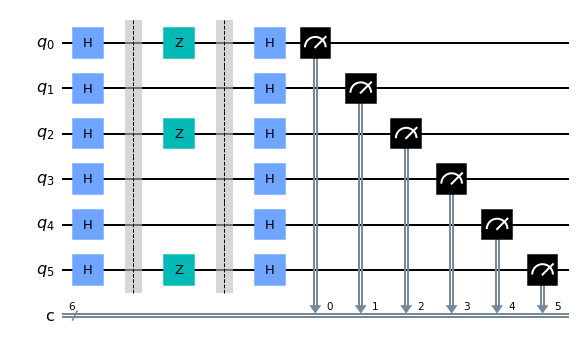

In [4]:
# 量子回路を生成する
qc = QuantumCircuit(n, n)

# 全量子ビットに対してアダマールゲートを適用させる。
for i in range(n) :
    qc.h(i)

qc.barrier()
# オラクル実行
oracle(qc, a)
qc.barrier()

# 全量子ビットに対してアダマールゲートを適用させる。
for i in range(n) :
    qc.h(i)

# 測定ゲートを適用させる。
for i in range(n) :
    qc.measure(i, i)

# 量子回路を描画する
qc.draw('mpl')

In [5]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
# ジョブを実行する
job = execute(qc, backend=backend, shots=1024)
cal_results=job.result()

{'100101': 1024}


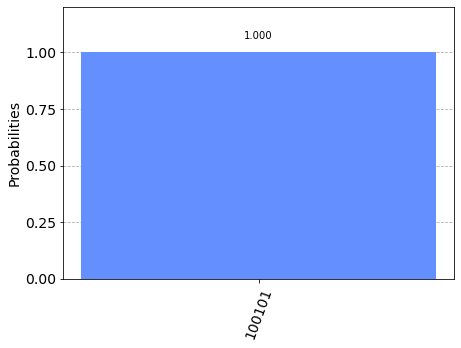

In [6]:
# 結果を取得して描画&プロットする。
answer = cal_results.get_counts()
print(answer)
plot_histogram(answer)